In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [ ]:
# build a csv file with the image names from the given folder

def build_db(folder, image_type='.jpg'):
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(image_type):
                with open('/share/pi/ogevaert/zhang/body_classifier/images.csv','a+') as fh:
                    fh.write(os.path.join(root, file) + '\n')

build_db('/share/pi/ogevaert/sadee/skin/fitz17k/images')

In [5]:
umap = '/share/pi/ogevaert/zhang/body_classifier/umap_body_parts_2.png'
# read in the umap image as  a matplotlib image

In [6]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_2.csv'
df = pd.read_csv(csv)

In [25]:
# loop through all the images and get the coordinates closest to (5.5, 5) with a distance of 1
dermoscopy = []
for i in range(len(df)):
    x = df.iloc[i]['coord_1']
    y = df.iloc[i]['coord_2']
    if np.sqrt((x-5.5)**2 + (y-5)**2) < 1:
        dermoscopy.append(df.iloc[i]['path'])

print(len(dermoscopy))
# save the dermoscopy images to a csv
df = pd.DataFrame(dermoscopy, columns=['path'])
df.to_csv('/share/pi/ogevaert/zhang/body_classifier/dermoscopy.csv', index=False)

# display a couple of the images
# for i in range(5):
#     plt.imshow(plt.imread(dermoscopy[i]))
#     plt.show()

266


In [37]:

csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_2.csv'
df = pd.read_csv(csv)

# loop through all the images and get the coordinates closest to (-1, -3) with a distance of 0.5
closeup = []
for i in range(len(df)):
    x = df.iloc[i]['coord_1']
    y = df.iloc[i]['coord_2']
    if np.sqrt((x+0.8)**2 + (y+2.9)**2) < 0.55:
        closeup.append(df.iloc[i]['path'])

print(len(closeup))
# save the dermoscopy images to a csv
df = pd.DataFrame(closeup, columns=['path'])
df.to_csv('/share/pi/ogevaert/zhang/body_classifier/closeup.csv', index=False)

# display a couple of the images
# for i in range(10):
#     plt.imshow(plt.imread(closeup[i]))
#     plt.show()

46


In [27]:

csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_2.csv'
df = pd.read_csv(csv)

# loop through all the images and get the coordinates closest to (7.5, 7.5) with a distance of 1
nonskin = []
for i in range(len(df)):
    x = df.iloc[i]['coord_1']
    y = df.iloc[i]['coord_2']
    if np.sqrt((x-7.5)**2 + (y-7.5)**2) < 1:
        nonskin.append(df.iloc[i]['path'])

print(len(nonskin))
# save the dermoscopy images to a csv
df = pd.DataFrame(closeup, columns=['path'])
df.to_csv('/share/pi/ogevaert/zhang/body_classifier/nonskin.csv', index=False)

#display a couple of the images
# for i in range(5):
#     plt.imshow(plt.imread(nonskin[i]))
#     plt.show()

47


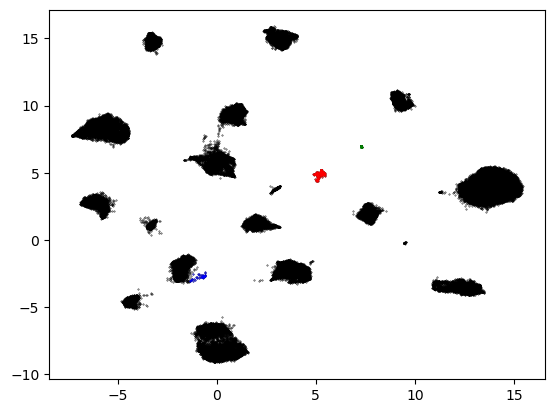

In [38]:
# plot all of the coordinates on a scatterplot but highlight the dermoscopy and closeup images

csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_2.csv'
df = pd.read_csv(csv)

coord_1 = df['coord_1']
coord_2 = df['coord_2']

plt.scatter(coord_1, coord_2, s=0.1, c='black')
# if the image is a dermoscopy image, plot it in red
for i in range(len(df)):
    if df.iloc[i]['path'] in dermoscopy:
        plt.scatter(df.iloc[i]['coord_1'], df.iloc[i]['coord_2'], s=0.1, c='red')
# if the image is a closeup image, plot it in blue
for i in range(len(df)):
    if df.iloc[i]['path'] in closeup:
        plt.scatter(df.iloc[i]['coord_1'], df.iloc[i]['coord_2'], s=0.1, c='blue')
# if the image is a nonskin image, plot it in green
for i in range(len(df)):
    if df.iloc[i]['path'] in nonskin:
        plt.scatter(df.iloc[i]['coord_1'], df.iloc[i]['coord_2'], s=0.1, c='green')

plt.savefig('/share/pi/ogevaert/zhang/body_classifier/filtered.png', dpi=300)
plt.show()


Train/Test Split

In [53]:
file = '/share/pi/ogevaert/zhang/SkinSegmentation/body_parts/body_train/image_path_results_final.csv'
file = pd.read_csv(file)

dermoscopy_df = pd.read_csv('/share/pi/ogevaert/zhang/body_classifier/dermoscopy.csv')
closeup_df = pd.read_csv('/share/pi/ogevaert/zhang/body_classifier/closeup.csv')
nonskin_df = pd.read_csv('/share/pi/ogevaert/zhang/body_classifier/nonskin.csv')
# create a copy of file_df

file_df = file.copy()

for i in range(len(file_df)):
    path = file_df.iloc[i]['image_file']
    # append /share/pi/ogevaert/sadee/skin/clinical/som-dermatology-photos-2020/ to the path
    path = '/share/pi/ogevaert/sadee/skin/clinical/som-dermatology-photos-2020/' + path

    # if the path is in dermoscopy_df, set the body_part to dermoscopy
    if path in dermoscopy_df['path'].values:
        file_df['body_label'][i] = 'dermoscope'
        print(file_df['image_file'][i] + ' dermoscope')
    # if the path is in closeup_df, set the body_part to closeup
    elif path in closeup_df['path'].values:
        file_df['body_label'][i] = 'closeup'
        print(file_df['image_file'][i] + ' closeup')
    # if the path is in nonskin_df, set the body_part to nonskin
    elif path in nonskin_df['path'].values:
        file_df['body_label'][i] = 'non-skin'
        print(file_df['image_file'][i] + ' non-skin')


file_df.to_csv('/share/pi/ogevaert/zhang/body_classifier/image_path_results_final.csv', index=False)


/tmp/ipykernel_68611/2649337393.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_df['body_label'][i] = 'closeup'
/tmp/ipykernel_68611/2649337393.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_df['body_label'][i] = 'dermoscope'


S-PRD-1795929.JPG closeup
S-PRD-2145879.JPG dermoscope
S-PRD-2462546.JPG dermoscope
S-PRD-2483283.JPG dermoscope
S-PRD-2483664.JPG dermoscope
S-PRD-2483683.JPG dermoscope


/tmp/ipykernel_68611/2649337393.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  file_df['body_label'][i] = 'non-skin'


S-PRD-2746358.JPG nonskin
S-PRD-2793884.JPG closeup
S-PRD-2816591.JPG dermoscope
S-PRD-2816616.JPG dermoscope
S-PRD-2817886.JPG closeup
S-PRD-3116860.JPG dermoscope
S-PRD-3116875.JPG dermoscope
S-prd-3496657.JPG nonskin
S-prd-3710485.JPG nonskin
S-prd-3774230.JPG dermoscope
S-prd-4501367.JPG nonskin
S-prd-4633967.JPG nonskin
S-prd-6325664.JPG nonskin
S-prd-8550406.JPG closeup
S-prd-9657925.JPG nonskin
S-prd-10311153.JPG dermoscope
S-prd-10311270.JPG dermoscope
S-prd-12162096.JPG dermoscope
S-prd-12162963.JPG dermoscope
S-prd-12164901.JPG dermoscope
S-prd-12173673.JPG dermoscope
S-prd-15080685.JPG dermoscope
S-prd-15080854.JPG dermoscope
S-prd-15081326.JPG dermoscope
S-prd-15082047.JPG dermoscope
S-prd-16026415.JPG dermoscope
S-prd-17756598.JPG closeup
S-prd-17944591.JPG nonskin
S-prd-17944620.JPG nonskin
S-prd-17962406.JPG dermoscope
S-prd-19117467.JPG dermoscope
S-prd-19119087.JPG dermoscope
S-prd-19119265.JPG dermoscope
S-prd-19119666.JPG dermoscope
S-prd-20525013.JPG nonskin
S-prd-2

In [54]:
file1 = '/share/pi/ogevaert/zhang/SkinSegmentation/body_parts/body_train/image_path_results_final.csv'
file2 = '/share/pi/ogevaert/zhang/body_classifier/image_path_results_final.csv'

# print the difference between the two files body_label columns
file1_df = pd.read_csv(file1)
file2_df = pd.read_csv(file2)

diff = 0
for i in range(len(file1_df)):
    if file1_df.iloc[i]['body_label'] != file2_df.iloc[i]['body_label']:
        diff += 1
print(diff)
        


183


In [52]:
from sklearn.model_selection import train_test_split

large_file = '/share/pi/ogevaert/zhang/body_classifier/image_path_results_final.csv'
large_df = pd.read_csv(large_file)

# split the large_df into train and test
train_df, test_df = train_test_split(large_df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(test_df, test_size=0.5, random_state=42)

# drop indices
train_df = train_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

# save the train, val, and test dfs to csvs
train_df.to_csv('/share/pi/ogevaert/zhang/body_classifier/body_train.csv', index=False)
val_df.to_csv('/share/pi/ogevaert/zhang/body_classifier/body_val.csv', index=False)
test_df.to_csv('/share/pi/ogevaert/zhang/body_classifier/body_test.csv', index=False)

# FOR EVERYTHING

In [3]:
import os
import shutil
import xlsxwriter
import io
from PIL import Image
import xlsxwriter.utility

label_dict = {"face": 0, "scalp": 1, "ear": 2, "neck": 3, "shoulders": 4, "arms_upper": 5, "arms_lower": 6, "hands": 7, "chest": 8, "abdomen": 9, "back_upper": 10, "back_lower": 11, "hips_and_glutes": 12, "genital_and_perianal": 13, "legs_upper": 14, "legs_lower": 15, "feet": 16, "closeup": 17, "dermoscope": 18, "non-skin": 19 }
inverse_label_dict = {v: k for k, v in label_dict.items()}
def filter_umap(center, radius, csv, body_label):
    df = pd.read_csv(csv)
    coord_1 = df['coord_1']
    coord_2 = df['coord_2']
    # filter the df to only include the points within the circle
    df = df[(coord_1 - center[0])**2 + (coord_2 - center[1])**2 <= radius**2]
    #return only the entries with the incorrect body_label
    df_diff = df[df['true'] != body_label]
    return df, df_diff

def display_selected(csv, body_label, df_filtered):
    df = pd.read_csv(csv)
    coord_1 = df['coord_1']
    coord_2 = df['coord_2']


    plt.scatter(coord_1, coord_2, s=0.1, c='black')
    plt.scatter(df_filtered['coord_1'], df_filtered['coord_2'], s=0.1, c='red')
    plt.show()


def copy_to_folder(df, folder):
    if not os.path.exists(folder):
        os.makedirs(folder)
    for i in range(len(df)):
        path = df.iloc[i]['path']
        shutil.copy(path, folder)


def get_resized_image_data(file_path, bound_width_height = (250, 250)):
    # get the image and resize it
    im = Image.open(file_path)
    im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking

    # stuff the image data into a bytestream that excel can read
    im_bytes = io.BytesIO()
    im.save(im_bytes, format='PNG')
    return im_bytes

def create_excel(name, df, folder):
    workbook = xlsxwriter.Workbook(name)
    worksheet = workbook.add_worksheet()

    print('in create_excel')
    
    images = []
    #df = pd.read_csv(csv)
    df = df.reset_index(drop=True)
    for index, row in df.iterrows():
        images.append(row['path'])
        
    image_row = 0
    image_col = 4
    for image in images:
        try:
            cell = xlsxwriter.utility.xl_rowcol_to_cell(image_row, image_col)
            # insert the name of the mask file into column 1
            worksheet.write(image_row, 1, df['path'][image_row])
            # insert the label of the image file into column 2
            worksheet.write(image_row, 2, df['true'][image_row])
            worksheet.write(image_row, 3, inverse_label_dict[df['true'][image_row]])
            #print('trying to get resized image data')

            # get the image data
            image = get_resized_image_data(image)
            #print('got resized image data')

            worksheet.insert_image(cell, df['path'][image_row], {'image_data': image})

        # resize the image and insert it into the excel file
        #worksheet.insert_image(image_row, image_col, image, {'x_scale': 0.1, 'y_scale': 0.1, 
                            # 'x_offset': 0, 'y_offset': 0,
                            # 'positioning': 1})
        # resize the column and row width to fit the image

            worksheet.set_column(image_col, image_col, 250)
            worksheet.set_row(image_row, 250)

            image_row += 1
        except:
            # if the image is not found, remove it from the csv file
            print('image not found: ', image)
            continue
        
    # save the excel file
    workbook.close()
    

In [33]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_face, df_face_diff = filter_umap([-2.5, 6.25], 3, csv, label_dict['face'])
print(len(df_face), len(df_face_diff))
#display_selected(csv, label_dict['face'], df_face)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/face.xlsx', df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')

8187 163
copied to folder
in create_excel


/tmp/ipykernel_533267/2148433507.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking


In [ ]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_ear, df_ear_diff = filter_umap([-0.5, 0.0], 1.5, csv, label_dict['ear'])
print(len(df_ear), len(df_ear_diff))
display_selected(csv, label_dict['ear'], df_ear)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/ear.xlsx', df_ear_diff, '/share/pi/ogevaert/zhang/body_classifier/face')

In [ ]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_neck, df_neck_diff = filter_umap([2.5, 10.0], 2, csv, label_dict['neck'])
print(len(df_neck), len(df_neck_diff))
display_selected(csv, label_dict['neck'], df_neck)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/neck.xlsx', df_neck_diff, '/share/pi/ogevaert/zhang/body_classifier/face')

In [40]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_scalp, df_scalp_diff = filter_umap([2.5, 3.25], 2, csv, label_dict['scalp'])
print(len(df_scalp), len(df_scalp_diff))
#display_selected(csv, label_dict['scalp'], df_scalp)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/scalp.xlsx', df_scalp_diff, '/share/pi/ogevaert/zhang/body_classifier/face')

2576 95
copied to folder
in create_excel


/tmp/ipykernel_533267/2148433507.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking


In [53]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_shoulders, df_shoulders_diff = filter_umap([7.95, 8.9], 1.5, csv, label_dict['shoulders'])
print(len(df_shoulders), len(df_shoulders_diff))
#display_selected(csv, label_dict['shoulders'], df_shoulders)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/shoulders.xlsx', df_shoulders_diff, '/share/pi/ogevaert/zhang/body_classifier/face')

1855 180
copied to folder
in create_excel


/tmp/ipykernel_533267/2148433507.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking


In [57]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_chest, df_chest_diff = filter_umap([7.5, 12], 1.8, csv, label_dict['chest'])
print(len(df_chest), len(df_chest_diff))
#display_selected(csv, label_dict['chest'], df_chest)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/chest.xlsx', df_chest_diff, '/share/pi/ogevaert/zhang/body_classifier/face')

3147 204
copied to folder
in create_excel


/tmp/ipykernel_533267/2148433507.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking


In [60]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_arms_upper, df_arms_upper_diff = filter_umap([8.75, 4.75], 1.8, csv, label_dict['arms_upper'])
print(len(df_arms_upper), len(df_arms_upper_diff))
#display_selected(csv, label_dict['arms_upper'], df_arms_upper)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/arms_upper.xlsx', df_arms_upper_diff, '/share/pi/ogevaert/zhang/body_classifier/face')

2981 231
copied to folder
in create_excel


/tmp/ipykernel_533267/2148433507.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking


In [65]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_arms_lower, df_arms_lower_diff = filter_umap([8.75, 2], 1.1, csv, label_dict['arms_lower'])
print(len(df_arms_lower), len(df_arms_lower_diff))
#display_selected(csv, label_dict['arms_lower'], df_arms_lower)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/arms_lower.xlsx', df_arms_lower_diff, '/share/pi/ogevaert/zhang/body_classifier/face')

2278 213
copied to folder
in create_excel


/tmp/ipykernel_533267/2148433507.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking


In [68]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_hands, df_hands_diff = filter_umap([7.5, -2.5], 1.2, csv, label_dict['hands'])
print(len(df_hands), len(df_hands_diff))
#display_selected(csv, label_dict['hands'], df_hands)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/hands.xlsx', df_hands_diff, '/share/pi/ogevaert/zhang/body_classifier/face')

2153 42
copied to folder
in create_excel


/tmp/ipykernel_533267/2148433507.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking


In [89]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_back_upper, df_back_upper_diff = filter_umap([10.1, 10.1], 1, csv, label_dict['back_upper'])
df_back_upper_2, df_back_upper_diff_2 = filter_umap([10.3, 12.5], 1.8, csv, label_dict['back_upper'])
print(len(df_back_upper), len(df_back_upper_diff))
# for everything different in the second filter, add it to the first
for index, row in df_back_upper_2.iterrows():
    if not row['path'] in df_back_upper['path'].values:
        df_back_upper = df_back_upper.append(row)

for index, row in df_back_upper_diff_2.iterrows():
    if not row['path'] in df_back_upper_diff['path'].values:
        df_back_upper_diff = df_back_upper_diff.append(row)

print(len(df_back_upper), len(df_back_upper_diff))

#display_selected(csv, label_dict['back_upper'], df_back_upper)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/back_upper.xlsx', df_back_upper_diff, '/share/pi/ogevaert/zhang/body_classifier/face')

1921 254


/tmp/ipykernel_533267/2415361076.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_back_upper = df_back_upper.append(row)
/tmp/ipykernel_533267/2415361076.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_back_upper = df_back_upper.append(row)
/tmp/ipykernel_533267/2415361076.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_back_upper = df_back_upper.append(row)
/tmp/ipykernel_533267/2415361076.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_back_upper = df_back_upper.append(row)
/tmp/ipykernel_533267/2415361076.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

5815 439
copied to folder
in create_excel


/tmp/ipykernel_533267/2148433507.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking


In [93]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_back_lower, df_back_lower_diff = filter_umap([12.5, 11.25], .9, csv, label_dict['back_lower'])
df_back_lower_2, df_back_lower_diff_2 = filter_umap([11.5, 10.3], 0.6, csv, label_dict['back_lower'])
print(len(df_back_lower), len(df_back_lower_diff))
# for everything different in the second filter, add it to the first
for index, row in df_back_lower_2.iterrows():
    if not row['path'] in df_back_lower['path'].values:
        df_back_lower = df_back_lower.append(row)

for index, row in df_back_lower_diff_2.iterrows():
    if not row['path'] in df_back_lower_diff['path'].values:
        df_back_lower_diff = df_back_lower_diff.append(row)

print(len(df_back_lower), len(df_back_lower_diff))

#display_selected(csv, label_dict['back_lower'], df_back_lower)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/back_lower.xlsx', df_back_lower_diff, '/share/pi/ogevaert/zhang/body_classifier/face')

589 50


/tmp/ipykernel_533267/3276788452.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_back_lower = df_back_lower.append(row)
/tmp/ipykernel_533267/3276788452.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_back_lower = df_back_lower.append(row)
/tmp/ipykernel_533267/3276788452.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_back_lower = df_back_lower.append(row)
/tmp/ipykernel_533267/3276788452.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_back_lower = df_back_lower.append(row)
/tmp/ipykernel_533267/3276788452.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future 

1022 166
copied to folder
in create_excel


/tmp/ipykernel_533267/2148433507.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking


In [14]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_abdomen, df_abdomen_diff = filter_umap([13, 9.7], .9, csv, label_dict['abdomen'])
df_abdomen_2, df_abdomen_diff_2 = filter_umap([12.2, 9.1], 0.75, csv, label_dict['abdomen'])
print(len(df_abdomen), len(df_abdomen_diff))
# for everything different in the second filter, add it to the first
for index, row in df_abdomen_2.iterrows():
    if not row['path'] in df_abdomen['path'].values:
        df_abdomen = df_abdomen.append(row)

for index, row in df_abdomen_diff_2.iterrows():
    if not row['path'] in df_abdomen_diff['path'].values:
        df_abdomen_diff = df_abdomen_diff.append(row)

print(len(df_abdomen), len(df_abdomen_diff))

#display_selected(csv, label_dict['abdomen'], df_abdomen)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/abdomen.xlsx', df_abdomen_diff, '/share/pi/ogevaert/zhang/body_classifier/face')

1518 100


/tmp/ipykernel_561645/1037348947.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_abdomen = df_abdomen.append(row)
/tmp/ipykernel_561645/1037348947.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_abdomen = df_abdomen.append(row)
/tmp/ipykernel_561645/1037348947.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_abdomen = df_abdomen.append(row)
/tmp/ipykernel_561645/1037348947.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_abdomen = df_abdomen.append(row)
/tmp/ipykernel_561645/1037348947.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conc

2040 199
copied to folder
in create_excel


/tmp/ipykernel_561645/2148433507.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking


In [20]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_hips_and_glutes, df_hips_and_glutes_diff = filter_umap([13.1, 7.45], 1, csv, label_dict['hips_and_glutes'])
print(len(df_hips_and_glutes), len(df_hips_and_glutes_diff))
#display_selected(csv, label_dict['hips_and_glutes'], df_hips_and_glutes)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/hips_and_glutes.xlsx', df_hips_and_glutes_diff, '/share/pi/ogevaert/zhang/body_classifier/face')

553 49
copied to folder
in create_excel


/tmp/ipykernel_561645/2148433507.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking


In [32]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_genital_and_perianal, df_genital_and_perianal_diff = filter_umap([11.3, 7], .9, csv, label_dict['genital_and_perianal'])
print(len(df_genital_and_perianal), len(df_genital_and_perianal_diff))
#display_selected(csv, label_dict['genital_and_perianal'], df_genital_and_perianal)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/genital_and_perianal.xlsx', df_genital_and_perianal_diff, '/share/pi/ogevaert/zhang/body_classifier/face')

370 30
copied to folder
in create_excel


/tmp/ipykernel_561645/2148433507.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking


In [40]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_legs_upper, df_legs_upper_diff = filter_umap([13.25, 4.9], 1.5, csv, label_dict['legs_upper'])
print(len(df_legs_upper), len(df_legs_upper_diff))
#display_selected(csv, label_dict['legs_upper'], df_legs_upper)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/legs_upper.xlsx', df_legs_upper_diff, '/share/pi/ogevaert/zhang/body_classifier/face')

2273 251
copied to folder
in create_excel


/tmp/ipykernel_561645/2148433507.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking


In [54]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_legs_lower, df_legs_lower_diff = filter_umap([12.4, 1.9], 1.9, csv, label_dict['legs_lower'])
print(len(df_legs_lower), len(df_legs_lower_diff))
#display_selected(csv, label_dict['legs_lower'], df_legs_lower)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/legs_lower.xlsx', df_legs_lower_diff, '/share/pi/ogevaert/zhang/body_classifier/face')

4393 224
copied to folder
in create_excel


/tmp/ipykernel_561645/2148433507.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking


In [58]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_feet, df_feet_diff = filter_umap([10, -3], 1.5, csv, label_dict['feet'])
print(len(df_feet), len(df_feet_diff))
#display_selected(csv, label_dict['feet'], df_feet)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/feet.xlsx', df_feet_diff, '/share/pi/ogevaert/zhang/body_classifier/face')

1410 35
copied to folder
in create_excel


/tmp/ipykernel_561645/2148433507.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking


In [68]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_dermoscope, df_dermoscope_diff = filter_umap([5.3, 7.2],.8, csv, label_dict['dermoscope'])
print(len(df_dermoscope), len(df_dermoscope_diff))
#display_selected(csv, label_dict['dermoscope'], df_dermoscope)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
#print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/dermoscope.xlsx', df_dermoscope, '/share/pi/ogevaert/zhang/body_classifier/face')

381 125
in create_excel


/tmp/ipykernel_561645/2148433507.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking


In [73]:
csv = '/share/pi/ogevaert/zhang/body_classifier/body_softmax_features_3.csv'
df_non_skin, df_non_skin_diff = filter_umap([4.6, 6.25], .3, csv, label_dict['non-skin'])
print(len(df_non_skin), len(df_non_skin_diff))
#display_selected(csv, label_dict['non-skin'], df_non_skin)
#copy_to_folder(df_face_diff, '/share/pi/ogevaert/zhang/body_classifier/face')
print('copied to folder')
create_excel('/share/pi/ogevaert/zhang/body_classifier/correcting_errors/non_skin.xlsx', df_non_skin, '/share/pi/ogevaert/zhang/body_classifier/face')

53 11
copied to folder
in create_excel


/tmp/ipykernel_561645/2148433507.py:42: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking


# Correcting the labels

In [19]:
import pandas as pd

#original_file = '/share/pi/ogevaert/zhang/body_classifier/image_path_results_final.csv'
path = '/share/pi/ogevaert/sadee/skin/clinical/som-dermatology-photos-2020/'
label_dict = {"face": 0, "scalp": 1, "ear": 2, "neck": 3, "shoulders": 4, "arms_upper": 5, "arms_lower": 6, "hands": 7, "chest": 8, "abdomen": 9, "back_upper": 10, "back_lower": 11, "hips_and_glutes": 12, "genital_and_perianal": 13, "legs_upper": 14, "legs_lower": 15, "feet": 16, "closeup": 17, "dermoscope": 18, "non-skin": 19 }
inverse_label_dict = {v: k for k, v in label_dict.items()}

def correct_file(original_file, xslx, save_file):
    df = pd.read_excel(xslx)
    # get the 1st and 5th columns
    df_second_col = df.iloc[:, 1]
    #print(df_second_col)
    df_fifth_col = df.iloc[:, 5]
    #print(df_fifth_col)
    for i in range(len(df_second_col)):
        df_second_col[i] = df_second_col[i].replace(path, '')
        df_fifth_col[i] = inverse_label_dict[df_fifth_col[i]]

    orig_df = pd.read_csv(original_file)
    # for all df_second_col, if the value is in orig_df, then replace the value in orig_df with the value in df_fifth_col
    for i in range(len(df_second_col)):
        if df_second_col[i] in orig_df.values:
            print('replaced', i, 'df_second_col', df_second_col[i], 'df_fifth_col', df_fifth_col[i])
            orig_df.loc[orig_df['image_file'] == df_second_col[i], 'body_label'] = df_fifth_col[i]
            
    
    # save to the original file
    orig_df.to_csv(save_file, index=False)


In [60]:
original_file = '/share/pi/ogevaert/zhang/body_classifier/image_path_results_final_2.csv'
xslx = '/share/pi/ogevaert/zhang/body_classifier/corrected/shoulders.xlsx'
save_file = '/share/pi/ogevaert/zhang/body_classifier/image_path_results_final_2.csv'

correct_file(original_file, xslx, save_file)

#S-prd-191581743.JPG

/tmp/ipykernel_938024/255183286.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_second_col[i] = df_second_col[i].replace(path, '')
/tmp/ipykernel_938024/255183286.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fifth_col[i] = inverse_label_dict[df_fifth_col[i]]


replaced 0 df_second_col S-prd-96853002.JPG df_fifth_col legs_lower
replaced 1 df_second_col S-prd-351363892.JPG df_fifth_col chest
replaced 2 df_second_col S-prd-142034055.JPG df_fifth_col arms_upper
replaced 3 df_second_col S-PRD-2199810.JPG df_fifth_col closeup
replaced 4 df_second_col S-prd-322579394.JPG df_fifth_col arms_upper
replaced 5 df_second_col S-prd-245273580.JPG df_fifth_col closeup
replaced 6 df_second_col S-prd-90624507.JPG df_fifth_col scalp
replaced 7 df_second_col S-prd-120897190.JPG df_fifth_col closeup
replaced 8 df_second_col S-PRD-1838064.JPG df_fifth_col shoulders
replaced 9 df_second_col S-prd-143627126.JPG df_fifth_col chest
replaced 10 df_second_col S-prd-45045761.JPG df_fifth_col scalp
replaced 11 df_second_col S-PRD-2330899.JPG df_fifth_col back_lower
replaced 12 df_second_col S-prd-97487191.JPG df_fifth_col arms_upper
replaced 13 df_second_col S-prd-145140317.JPG df_fifth_col shoulders
replaced 14 df_second_col S-PRD-2860589.JPG df_fifth_col face
replaced 

In [62]:
# print the difference between the two dataframes

def get_diff(csv1, csv2):
    df1 = pd.read_csv(csv1)
    df2 = pd.read_csv(csv2)
    # print the difference between the 'body_label' column
    df_diff = df1[df1['body_label'] != df2['body_label']]
    print(len(df_diff))

csv1 = '/share/pi/ogevaert/zhang/body_classifier/image_path_results_final.csv'
csv2 = '/share/pi/ogevaert/zhang/body_classifier/image_path_results_final_2.csv'

get_diff(csv1, csv2)

1056


# Create new Train Test Split

In [63]:
from sklearn.model_selection import train_test_split
import pandas as pd

csv = '/share/pi/ogevaert/zhang/body_classifier/image_path_results_final_2.csv'

df = pd.read_csv(csv)
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42, stratify=df['body_label'])
test_df, val_df = train_test_split(test_df, test_size=0.5, random_state=42, stratify=test_df['body_label'])

print(len(train_df), len(test_df), len(val_df))
train_df = train_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)
val_df = val_df.reset_index(drop=True)

train_df.to_csv('/share/pi/ogevaert/zhang/body_classifier/body_train_2.csv', index=False)
test_df.to_csv('/share/pi/ogevaert/zhang/body_classifier/body_test_2.csv', index=False)
val_df.to_csv('/share/pi/ogevaert/zhang/body_classifier/body_val_2.csv', index=False)

35985 4498 4499


# Web Images

In [1]:
import os
import shutil
import xlsxwriter
import io
from PIL import Image
import pandas as pd
import xlsxwriter.utility

label_dict = {"face": 0, "scalp": 1, "ear": 2, "neck": 3, "shoulders": 4, "arms_upper": 5, "arms_lower": 6, "hands": 7, "chest": 8, "abdomen": 9, "back_upper": 10, "back_lower": 11, "hips_and_glutes": 12, "genital_and_perianal": 13, "legs_upper": 14, "legs_lower": 15, "feet": 16, "closeup": 17, "dermoscope": 18, "non-skin": 19 }
inverse_label_dict = {v: k for k, v in label_dict.items()}


def get_resized_image_data(file_path, bound_width_height = (250, 250)):
    # get the image and resize it
    im = Image.open(file_path)
    im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking

    # stuff the image data into a bytestream that excel can read
    im_bytes = io.BytesIO()
    im.save(im_bytes, format='PNG')
    return im_bytes

def create_excel(name, df, folder):
    workbook = xlsxwriter.Workbook(name)
    worksheet = workbook.add_worksheet()

    print('in create_excel')
    
    images = []
    #df = pd.read_csv(csv)
    df = df.reset_index(drop=True)
    for index, row in df.iterrows():
        images.append(row['image_path'])
        
    image_row = 0
    image_col = 4
    for image in images:
        try:
            cell = xlsxwriter.utility.xl_rowcol_to_cell(image_row, image_col)
            # insert the name of the mask file into column 1
            worksheet.write(image_row, 1, df['image_path'][image_row])
            # insert the label of the image file into column 2
            worksheet.write(image_row, 2, df['prediction'][image_row])
            worksheet.write(image_row, 3, inverse_label_dict[df['prediction'][image_row]])
            #print('trying to get resized image data')

            # get the image data
            image = get_resized_image_data(image)
            #print('got resized image data')

            worksheet.insert_image(cell, df['image_path'][image_row], {'image_data': image})

        # resize the image and insert it into the excel file
        #worksheet.insert_image(image_row, image_col, image, {'x_scale': 0.1, 'y_scale': 0.1, 
                            # 'x_offset': 0, 'y_offset': 0,
                            # 'positioning': 1})
        # resize the column and row width to fit the image

            worksheet.set_column(image_col, image_col, 250)
            worksheet.set_row(image_row, 250)

            image_row += 1
        except:
            # if the image is not found, remove it from the csv file
            print('image not found: ', image)
            continue
        
    # save the excel file
    workbook.close()
    

In [2]:
file = '/share/pi/ogevaert/zhang/body_classifier/fitz17k_body_predictions.csv'

# create excel with the first 1000 images
df = pd.read_csv(file)
df = df[:1000]
create_excel('fitz17k_body_1000.xlsx', df, '/share/pi/ogevaert/zhang/body_classifier/fitz17k_body_predictions')

in create_excel


/tmp/ipykernel_1705244/244903888.py:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use Resampling.LANCZOS instead.
  im.thumbnail(bound_width_height, Image.ANTIALIAS)  # ANTIALIAS is important if shrinking
